# Primer Examen Parcial
## Bibliotecas Importantes

In [5]:
import pandas as pd                 # Bibliotecas util para analisis de informacion
import numpy as np                  # Bibliotecas util para trabajar con algebra en python
import matplotlib.pyplot as plt     # Bibliotecas util para graficar

from copy import deepcopy  # Funcion que nos permite copair arhcivos

# Ejercicio 1
## Obtener las funciones discriminantes de un clasificador estadístico a priori


In [ ]:
w1 = [[0.5, 10.5], [3.5, 10.5], [3, 18.5], [5.5, 13], [1.5, 12.5], [2, 15.5]]
w2 = [[6.5, 9.5], [8.5, 10], [9, 11.5], [7.5, 13.5], [8.5, 16], [9, 16.5]]

def get_mean_matrix(W):
    m = []
    s1, s2 = 0, 0
    for w in W:
        s1 += w[0]
        s2 += w[1]
    m.append(s1 / len(W))
    m.append(s2 / len(W))
    return np.array(m)

def get_mean(x_i):
    return np.mean(x_i)
    
def get_cov(x):
    x_arr = np.array(x)
    m, n = x_arr.shape[0], x_arr.shape[1]
    x_n = np.array([[x_arr[i][0] for i in range(m)], [x[i][1] for i in range(m)]])
    x_mean = np.array([get_mean(x_n[0]), get_mean(x_n[1])])
    sigma = []
    for i in range(n):
        l = []
        for j in range(n):
            res = np.mean(np.multiply(np.subtract(x_n[i], x_mean[i]),
                                      np.subtract(x_n[j], x_mean[j])))
            l.append(res)
        sigma.append(l)
    return np.array(sigma)


def solve():
    w1 = [[0.5, 10.5], [3.5, 10.5], [3, 18.5], [5.5, 13], [1.5, 12.5], [2, 15.5]]
    w2 = [[6.5, 9.5], [8.5, 10], [9, 11.5], [7.5, 13.5], [8.5, 16], [9, 16.5]]
    mean_matrixes = []
    cov_matrixes = []
    cov_matrixes_inv = []
    for x in [w1, w2]:
        x_np = np.array(x)
        m = get_mean_matrix(x)
        cov_m = get_cov(x)
        cov_m_inv = np.linalg.inv(cov_m)
        mean_matrixes.append(m)
        cov_matrixes.append(cov_m)
        cov_matrixes_inv.append(cov_m_inv)
    print("Medias")
    for m in mean_matrixes:
        print(m)
    print("Covarianzas")
    for c in cov_matrixes:
        print(c)
    print("Inversas de covarianzas")
    for c_inv in cov_matrixes_inv:
        print(c_inv)

solve()

Medias
[ 2.66666667 13.41666667]
[ 8.16666667 12.83333333]
Covarianzas
[[2.55555556 0.68055556]
 [0.68055556 8.03472222]]
[[0.80555556 1.19444444]
 [1.19444444 7.47222222]]
Inversas de covarianzas
[[ 0.40033448 -0.03390906]
 [-0.03390906  0.12733197]]
[[ 1.62701613 -0.26008065]
 [-0.26008065  0.17540323]]


Como podemos observar, las matrices de covarianzas no son las mismas por lo que tenemos que emplear la siguiente función discriminante:
$$fd = -\frac{1}{2}(X^T \cdot C_i^{-1} \cdot X) + (X^T \cdot C_i^{-1} \cdot m_i) - (\frac{1}{2} \cdot m_i^T \cdot C_i^{-1} \cdot m_i) - (\frac{1}{2} \cdot ln|Ci|)$$


# Ejercicio 2

Aplica la regla de aprendizaje para los pesos de una neurona artificial basada en el modelo del perceptron que calcule la función booleana XOR de dos parámetros mostrando la evolución de los pesos (8p)
Nota: El algoritmo sí termina, explica a qué se debe

In [ ]:
import numpy as np


def predict(x):
    return np.where(n_input(x) >= 0.0, 1, -1)


def n_input(x):
    return np.dot(x, weights[1:] + weights[0])


if __name__ == '__main__':
    eta = 0.01
    iterations = 5
    x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 1, 1, 0])
    rand = np.random.RandomState(1)
    weights = rand.normal(loc=0.0, scale=0.01, size=x.shape[1] + 1)
    errors_vect = []
    cont = 1
    # Epoch
    for _ in range(iterations):
        error = 0
        for xi, yi in zip(x, y):
            update_w = eta * (yi - predict(xi))
            weights[1:] += update_w * xi
            weights[0] += update_w
            error += int(update_w != 0.0)
        print('Pesos en paso ', cont, '\n- Pesos: ', weights)
        cont += 1
        errors_vect.append(error)

Pesos en paso  1 
- Pesos:  [-0.00375655 -0.01611756 -0.01528172]
Pesos en paso  2 
- Pesos:  [ 0.01624345 -0.00611756 -0.00528172]
Pesos en paso  3 
- Pesos:  [-0.00375655 -0.01611756 -0.01528172]
Pesos en paso  4 
- Pesos:  [ 0.01624345 -0.00611756 -0.00528172]
Pesos en paso  5 
- Pesos:  [-0.00375655 -0.01611756 -0.01528172]


El algoritmo sí termina dado que es un algoritmo supervisado y establecemos el número de iteraciones a realizar. En nuestra implementación, se están estableciendo 5 epochs de entrenamiento. Esto implica que cuando llegue a la quinta iteración, el algoritmo se detendrá.

# Ejercicio 3
Escribir un pseudocódigo detallado del algoritmo SBS


```
X <- matriz de caracteristicas
y <- vector objetivo de SBS
k <- número de dimensiones de X
d <- número de dimensiones esperadas
puntajes_global <- lista vacia
subconjuntos_global <- lista vacia
mientras k > d:
    puntajes <- lista vacia
    subconjuntos <- lista vacia
    combinaciones <- lista de combinaciones de una lista con k-enteros
    por cada c en combinaciones:
        puntaje <- calcula_rendimiento
        agrega puntaje a puntajes
        agrega c a subconjuntos
    mejor_idx <- indice del valor maximo de puntajes
    agrega subconjuntos[mejor_idx] a subconjuntos_global
    agrega puntajes[mejor_idx] a puntajes_global
    quita mejor_idx de X
    k <- k - 1
```

# Ejercicio 4

¿Qué sucede al utilizar Linear Discriminant Analysis (LDA) sobre el conjunto de medias lunas? Escribe un código que lo muestre (7p)
Nota: Debes adjuntar el código correspondiente

> Al utilizar LDA, estamos encontrando un subespacio de características que optimice y nos permita separar las clases de un conjunto de datos. En particular, en el conjunto de medias lunas, lo que estamos generando es un conjunto de datos linealmente no separables—dado que son medios círculos intercalados en el plano. Esta aseveración, permite demostrar si un método de clasificación—en este caso de reducción de dimensión—es correcto para el tipo de datos a estudiar.

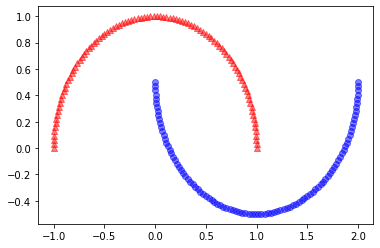

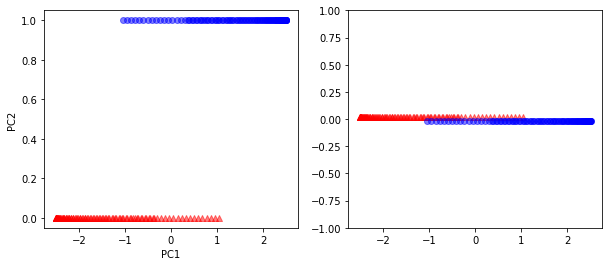

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

if __name__ == '__main__':
    # Generamos y mostramos gráfica de medias lunas
    x, y = make_moons(n_samples=200, random_state=123)
    plt.scatter(x[y == 0, 0], x[y == 0, 1], color='red', marker='^', alpha=0.5)
    plt.scatter(x[y == 1, 0], x[y == 1, 1], color='blue', marker='o', alpha=0.5)
    plt.show()

    # Inicializamos LDA y el modelo de linear regression
    lda = LDA(n_components=1)
    lr = LogisticRegression()
    # Ajustar y transformar los datos
    X_train_lda = lda.fit_transform(x, y)

    # Se grafica el resultado obtenido en dos distintas gráficas
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    ax[0].scatter(X_train_lda[y == 0, 0], y[y == 0], color='red', marker='^', alpha=0.5)
    ax[0].scatter(X_train_lda[y == 1, 0], y[y == 1], color='blue', marker='o', alpha=0.5)
    ax[1].scatter(X_train_lda[y == 0, 0], np.zeros(100) + 0.02, color='red', marker='^', alpha=0.5)
    ax[1].scatter(X_train_lda[y == 1, 0], np.zeros(100) - 0.02, color='blue', marker='o', alpha=0.5)
    ax[0].set_xlabel('PC1')
    ax[0].set_ylabel('PC2')
    ax[1].set_ylim([-1, 1])
    ax[0].set_xlabel('PC1')
    plt.show()


# Ejercicio 5

Escribe un código que utilice KernelPCA con otra función de kernel para separar medias lunas (10p) Nota: Debes adjuntar el código correspondiente

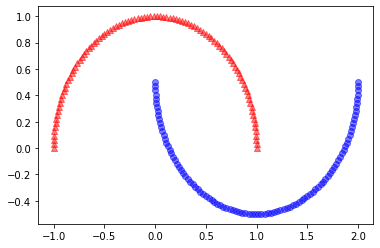

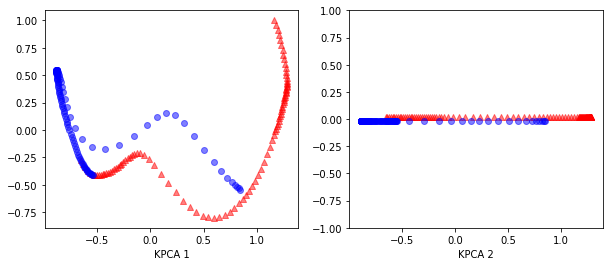

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA

if __name__ == '__main__':
    # Generamos y mostramos gráfica de medias lunas
    x, y = make_moons(n_samples=200, random_state=123)
    plt.scatter(x[y == 0, 0], x[y == 0, 1], color='red', marker='^', alpha=0.5)
    plt.scatter(x[y == 1, 0], x[y == 1, 1], color='blue', marker='o', alpha=0.5)

    # Inicializamos el modelo de KPCA de sklearn
    kpca = KernelPCA(n_components=2, kernel='sigmoid', gamma=15)
    x_kpca = kpca.fit_transform(x)

    # Se grafica el resultado obtenido en dos distintas gráficas
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    ax[0].scatter(x_kpca[y == 0, 0], x_kpca[y == 0, 1], color='red', marker='^', alpha=0.5)
    ax[0].scatter(x_kpca[y == 1, 0], x_kpca[y == 1, 1], color='blue', marker='o', alpha=0.5)
    ax[1].scatter(x_kpca[y == 0, 0], np.zeros(100) + 0.02, color='red', marker='^', alpha=0.5)
    ax[1].scatter(x_kpca[y == 1, 0], np.zeros(100) - 0.02, color='blue', marker='o', alpha=0.5)
    ax[0].set_xlabel('KPCA 1')
    ax[1].set_ylim([-1, 1])
    ax[1].set_xlabel('KPCA 2')
    plt.show()


Es claro que el kernel sigmoide no ha podido separar linealmente los conjuntos y que por ello obtenemos dicho resultado. En una revisión rápida, todo indicaría que solamente se puede hacer la transformación en conjuntos lineales con rbf.

# 6. Elige dos estimadores y demuestra que definen algoritmos escalables (10p)

Para mostrar que un algoritmo es escalable hay que mostrar que la estadistica que esta calculando es una *estadistica asociativa*

![imagen](https://github.com/patoba/ContenidoOnline/blob/main/escalable.png?raw=True)


# 7. Escribir un código que obtenga la matriz de momentos aumentada a partir de un conjunto de vectores de datos de dimensión p (15p)
Nota: Debes adjuntar el código correspondiente



In [ ]:
def matriz_momentos_aumentada(*vectores):
    W = np.column_stack(vectores)
    W = W @ W.T
    p = len(W)
    M = np.zeros([p + 1]*2)
    for i in range(-1, p):
        a = np.array([1]*p)
        if i >= 0:
            a = W[:, i]
        for j in range(i + 1, p):
            M[i + 1, j+1] =  a @ W[:, j]
    M = M.T + M
    for i in range(0, p):
        M[i+1, i+1] = W[:, i] @ W[:, i]
    M[0, 0] = p

a = [1,2,3]
b = [4,5,6]
matriz_momentos_aumentada(a, b)

[[3.000e+00 6.600e+01 8.700e+01 1.080e+02]
 [6.600e+01 1.502e+03 1.984e+03 2.466e+03]
 [8.700e+01 1.984e+03 2.621e+03 3.258e+03]
 [1.080e+02 2.466e+03 3.258e+03 4.050e+03]]
[[17 22 27]
 [22 29 36]
 [27 36 45]]


# 8. Obtener las expresiones para determinar los intervalos de contenedores para histogramas bidimensionales en función del número de contenedores.

Considerando que nos dan el número de intervalos o *bins* que se desean graficar en el histograma, se utilizan las siguientes expresiones para determinar el rango de dada uno de los intervalos:

Se define:
- $D$ — conjunto de datos bajo análisis y del cual se desea obtener el histograma
- $h$ — número de intervalos
- $w$ — como la anchura de cada intervalo que se calcula como: $\frac{x(n) - x(1)}{h}$
- $x(1)$ — como la mínima observación en $D$
- $x(n)$ — como la máxima observación en $D$

Después, se utilizan las siguientes expresiones:

**Para el primer intervalo:**
$b_1 = [x_1, x_1 + w]$

**Para los intervalos intermedios:**
$b_i = (x_1 + w(i-1), x_1 + w(i)]$

**Para el último intervalo:**
$b_h = (x_1 + w(h-1), x_n)$

Finalmente, esto genera una lista $B$ que contiene todos los rangos de intervalos—según el húmero de contenedores deseados. Es decir, su tamaño es $h$. La lista tiene la siguiente forma:

$B = \{b_1, \cdots, b_i, \cdots, b_h\}$

# 9. Un resorte se somete a estiramiento aplicando distintos pesos (X) y se anotó su alargamiento (y); utilizando la solución de la ecuación normal, determina los estimadores $\hat{\beta}, \sigma_\epsilon^2, var(\hat{\beta})$:
Peso $X = [0.2, 0.4, 0.5, 0.9, 1]$  
Alargamiento $y = [0.06, 0.12, 0.15, 0.26, 0.29]$  
Debes mostrar la forma de calcular $X^TX$ y su inversa (10p)

## Definicion de los Estimadores

In [3]:
def concatenar_unos(x):
  if len(x.shape) == 1:
    x = x.reshape(len(x), 1)
  return np.hstack([np.ones((x.shape[0], 1)), x])

In [13]:
def beta(X, Y):
    return np.linalg.inv(X.T @ X) @ X.T @ Y

def sigma(y, X, beta):
    d = y - X @ beta
    n = len(y)
    q = len(beta)
    v = d @ d / (n - q)
    return v

def var(y, X, beta):
    print(sigma(y, X, beta))
    print(np.linalg.inv(X.T @ X))
    return sigma(y, X, beta) * np.linalg.inv(X.T @ X)

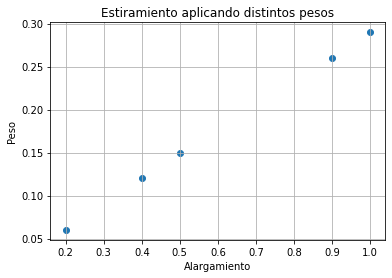

In [14]:
X = np.array([0.2, 0.4, 0.5, 0.9, 1])
y = np.array([0.06, 0.12, 0.15, 0.26, 0.29])

plt.scatter(X, y)
plt.title("Estiramiento aplicando distintos pesos")
plt.xlabel("Alargamiento")
plt.ylabel("Peso")
plt.grid(True)
plt.show()

## Procederemos a hallar el vector beta

In [15]:
beta_ = beta(concatenar_unos(X), y)
beta_

array([0.00513043, 0.28478261])

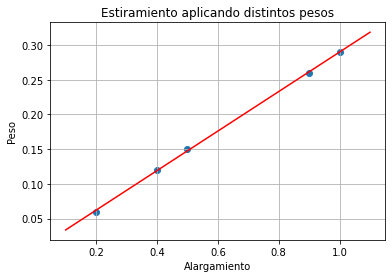

In [16]:
plt.scatter(X, y)
plt.title("Estiramiento aplicando distintos pesos")
plt.xlabel("Alargamiento")
plt.ylabel("Peso")
plt.grid(True)

xx = np.linspace(.1, 1.1, 100)
yy = concatenar_unos(xx) @ beta_
plt.plot(xx, yy, c="r")

plt.show()

## Obteniendo $\sigma_\epsilon^2$

In [17]:
sigma_ = sigma(y, concatenar_unos(X), beta_)
sigma_

4.4927536231884085e-06

## Obteniendo $var(\hat{\beta})$

In [18]:
var_ = var(y, concatenar_unos(X), beta_)
var_

4.4927536231884085e-06
[[ 0.9826087  -1.30434783]
 [-1.30434783  2.17391304]]


array([[ 4.41461878e-06, -5.86011342e-06],
       [-5.86011342e-06,  9.76685570e-06]])

# Ejercicio 10
Con los datos: $x = [0.2, 0.6, 0.6, 1.5, 1.8]$, $y = [0.1, 0.4, 0.9, 1.2, 1.7]$; escribe un código para comparar el resultado
obtenido con la regresión lineal estándar y el uso de las variaciones *Lasso* y *ElasticNet* tomando dos muestras
para entrenamiento

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [ ]:
x = np.array([0.2, 0.6, 0.6, 1.5, 1.8])
y = np.array([0.1, 0.4, 0.9, 1.2, 1.7])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
X_train.resize(len(X_train), 1)
y_train.resize(len(y_train), 1)
X_test.resize(len(X_test), 1)

print("X_train: ", X_train)
print("y_train: ", y_train)
print("X_test:", X_test)
print("y_test: ", y_test)

X_train:  [[0.6]
 [1.5]
 [0.6]]
y_train:  [[0.4]
 [1.2]
 [0.9]]
X_test: [[0.2]
 [1.8]]
y_test:  [0.1 1.7]


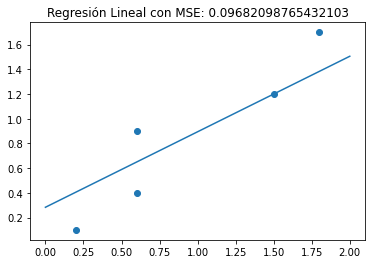

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
mse_lr = mse(y_test, lr.predict(X_test.reshape(len(X_test), 1)))

x_v = np.linspace(0,2)
y_v = lr.predict(x_v.reshape(len(x_v), 1))
plt.scatter(x, y)
plt.plot(x_v, y_v)
plt.title(f'Regresión Lineal con MSE: {mse_lr}')
plt.show()

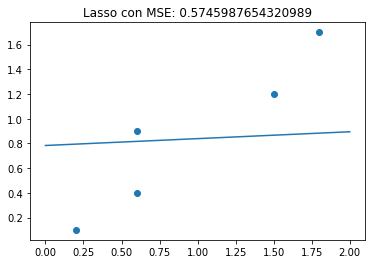

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
mse_lasso = mse(y_test, lasso.predict(X_test))

x_v = np.linspace(0,2)
y_v = lasso.predict(x_v.reshape(len(x_v), 1))
plt.scatter(x, y)
plt.plot(x_v, y_v)
plt.title(f'Lasso con MSE: {mse_lasso}')
plt.show()

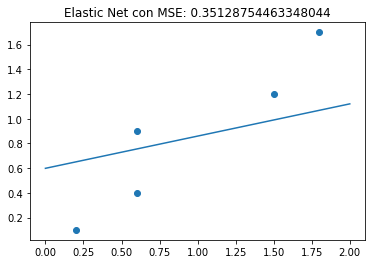

In [ ]:
en = ElasticNet(alpha=0.1)
en.fit(X_train, y_train)
mse_en = mse(y_test, en.predict(X_test))

x_v = np.linspace(0,2)
y_v = en.predict(x_v.reshape(len(x_v), 1))
plt.scatter(x, y)
plt.plot(x_v, y_v)
plt.title(f'Elastic Net con MSE: {mse_en}')
plt.show()

# Ejercicio 11
Obtener el dendrograma y determinar el mejor valor para el número de grupos para los datos siguientes: (7p)

${[0.5, 10.5], [3.5, 10.5], [3, 18.5], [5.5, 13], [1.5, 12.5], [2, 15.5], [6.5, 9.5], [8.5, 10], [9, 11.5], [7.5, 13.5], [8.5, 16], [9, 16.5]}$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt
import scipy.cluster.hierarchy as shc


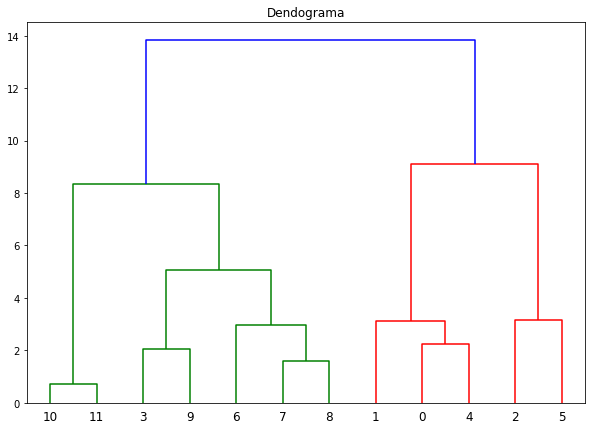

In [ ]:
d = [[0.5, 10.5], [3.5, 10.5], [3, 18.5], [5.5, 13], [1.5, 12.5], [2, 15.5], [6.5, 9.5], [8.5, 10], [9, 11.5], [7.5, 13.5], [8.5, 16], [9, 16.5]]
plt.figure(figsize=(10, 7))
plt.title('Dendograma')
dend = shc.dendrogram(shc.linkage(d, method='ward'))

El agrupamiento óptimo se alcanza con ward y es de 3

# 12. Aplicar el algoritmo k-medias a los datos siguientes con $k = 2:$ (8p)
${[0.5, 10.5], [3.5, 10.5], [3, 18.5], [5.5, 13], [1.5, 12.5], [2, 15.5], [6.5, 9.5], [8.5, 10], [9, 11.5], [7.5, 13.5], [8.5, 16], [9, 16.5]}$  
Debes mostrar las medias y grupos generados en cada iteración

## Cargamos los datos


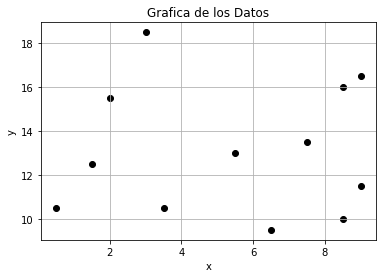

In [ ]:
# A partir de la data obtenida la separamos en dos ejes

data = np.array([[0.5, 10.5], [3.5, 10.5], [3, 18.5], [5.5, 13], [1.5, 12.5], [2, 15.5], [6.5, 9.5], [8.5, 10], [9, 11.5], [7.5, 13.5], [8.5, 16], [9, 16.5]])
eje1 = data[:,0]
eje2 = data[:,1]

# Graficamos 

plt.scatter(eje1, eje2, c = 'k')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Grafica de los Datos")
plt.grid(True)
plt.show()

## Definimos el algoritmo k-medias

In [ ]:
def funcion_de_costo(x, M):
  normas = np.linalg.norm(x - M, axis= 1)
  normas_al_cuadrado = normas ** 2
  suma_normas = np.sum(normas)
  return suma_normas / len(x)
  
def distancia(x, M, ax = 1):
  return np.linalg.norm(x - M, axis= ax)

def centroides_aleatorios(x, k):
  indices_centroides_aleatorios = np.random.randint(0, len(x), size = k)
  return x[indices_centroides_aleatorios]

def k_mean(x, k, centroides_inicio = None, iteraciones = 1000, E = 0.00001):
  if centroides_inicio is None:
    centroides_inicio = centroides_aleatorios(x, k)
  print("centroides iniciales:\n", centroides_inicio)
  m = len(x)
  M = deepcopy(centroides_inicio)
  # Vector C que nos sirve para almacenar los indices correspondientes a la clase
  C = np.zeros(m)
  i = 0
  
  costo_anterior = 1
  costo = funcion_de_costo(x, M[C.astype(int)])
  puntos = None
  while i < iteraciones and abs(costo_anterior - costo) > E:
    puntos = [[] for j in range(k)]
    
    costo_anterior = costo
    # Asignacion de puntos a centroides mas cercanos (Clases)
    for j in range(m):
      distancias = distancia(x[j], M)
      d = (distancias[0] - distancias[1]) ** 2
      clase = np.argmin(distancias)
      C[j] = clase
      puntos[clase].append(x[j])
    for j in range(k):
      M[j] = np.mean(puntos[j], axis = 0)  
    
    print("Iteracion:", i)
    print("Grupos 1:")
    print(puntos[0])
    print("Grupo 2:")
    print(puntos[1])
    print("Centroides:\n", M)
    print()
    i += 1
    
    costo = funcion_de_costo(x, M[C.astype(int)])
    
  return M, puntos

## Ejecutamos la funcion

In [ ]:
k = 2
M, puntos = k_mean(data, k)

centroides iniciales:
 [[ 2.  15.5]
 [ 5.5 13. ]]
Iteracion: 0
Grupos 1:
[array([ 0.5, 10.5]), array([ 3. , 18.5]), array([ 1.5, 12.5]), array([ 2. , 15.5])]
Grupo 2:
[array([ 3.5, 10.5]), array([ 5.5, 13. ]), array([6.5, 9.5]), array([ 8.5, 10. ]), array([ 9. , 11.5]), array([ 7.5, 13.5]), array([ 8.5, 16. ]), array([ 9. , 16.5])]
Centroides:
 [[ 1.75   14.25  ]
 [ 7.25   12.5625]]

Iteracion: 1
Grupos 1:
[array([ 0.5, 10.5]), array([ 3.5, 10.5]), array([ 3. , 18.5]), array([ 1.5, 12.5]), array([ 2. , 15.5])]
Grupo 2:
[array([ 5.5, 13. ]), array([6.5, 9.5]), array([ 8.5, 10. ]), array([ 9. , 11.5]), array([ 7.5, 13.5]), array([ 8.5, 16. ]), array([ 9. , 16.5])]
Centroides:
 [[ 2.1        13.5       ]
 [ 7.78571429 12.85714286]]

Iteracion: 2
Grupos 1:
[array([ 0.5, 10.5]), array([ 3.5, 10.5]), array([ 3. , 18.5]), array([ 1.5, 12.5]), array([ 2. , 15.5])]
Grupo 2:
[array([ 5.5, 13. ]), array([6.5, 9.5]), array([ 8.5, 10. ]), array([ 9. , 11.5]), array([ 7.5, 13.5]), array([ 8.5, 16. ]

## Graficamos los grupos y centroides

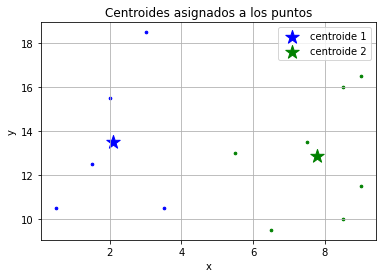

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
fig, ax = plt.subplots()
for i in range(k):
        puntos[i] = np.array(puntos[i])
        ax.scatter(puntos[i][:, 0], puntos[i][:, 1], s=7, c=colors[i])

for i, ((x, y), c) in enumerate(zip(M, colors)):
    ax.scatter(x, y, marker="*", s = 200, c=c, label="centroide %d" % (i+1))

plt.xlabel("x")
plt.ylabel("y")
ax.legend()
ax.grid(True)
plt.title("Centroides asignados a los puntos")
plt.show()